# The Question

**How many users worldwide use Spotify monthly, and how has this number changed over time?**

/var/folders/t1/532b478j6rg3y4r35c7btmjc0000gn/T/ipykernel_35303/3919111254.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


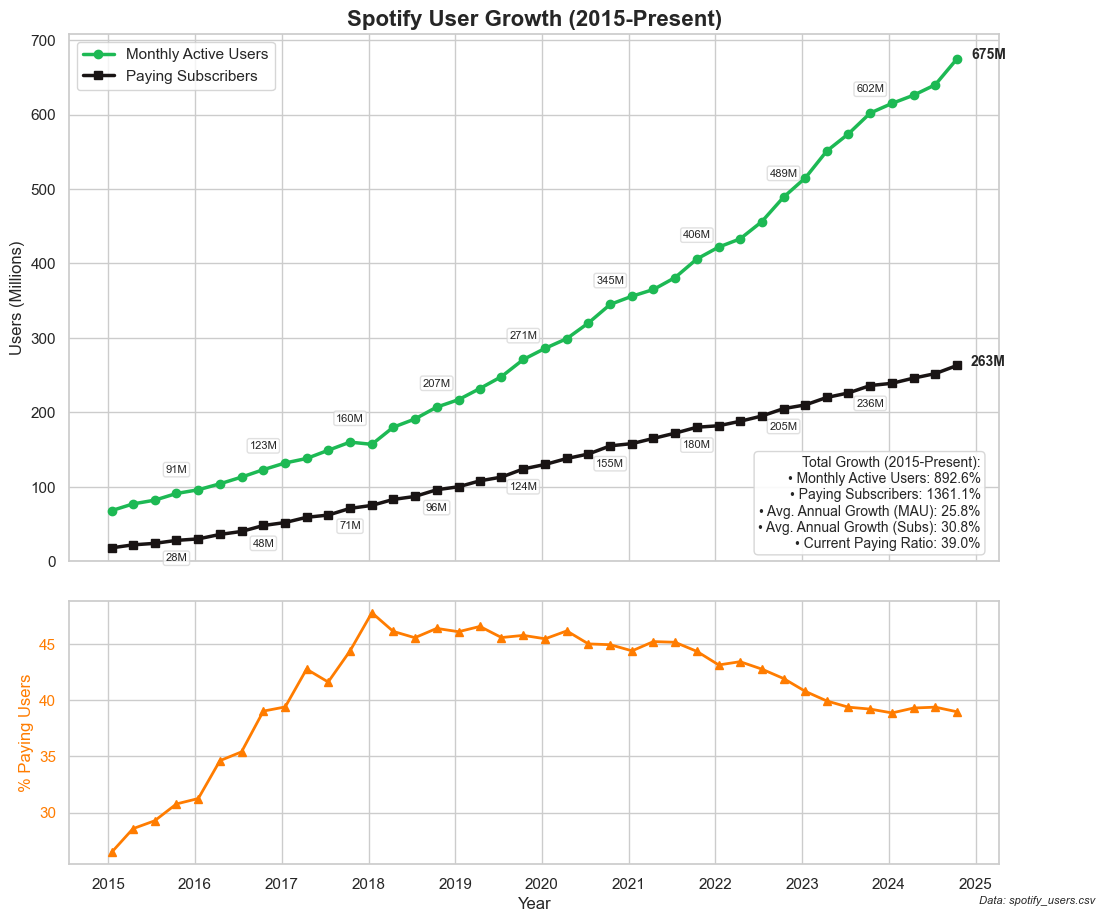

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from datetime import datetime

# Set a clean, minimal style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook")

# Read the CSV file
df = pd.read_csv('/Users/armandocriscuolo/c2025/data_science_project_2025/code/Data-Science-Project/Data-Question-1/spotify_users.csv')

# Convert quarterly dates (e.g., "Q1 2015") to datetime format
def parse_quarter_date(quarter_str):
    parts = quarter_str.split()
    quarter = int(parts[0][1:])
    year = int(parts[1])
    month = 3 * quarter - 2  # Q1->1, Q2->4, Q3->7, Q4->10
    return pd.Timestamp(year=year, month=month, day=15)

# Apply the custom date parser and sort by date
df['Date'] = df['Date'].apply(parse_quarter_date)
df = df.sort_values('Date')

# Calculate percentage of paying subscribers
df['Percentage Paying'] = (df['Paying Subscribers (Millions)'] / df['Monthly Active Users (Millions)']) * 100

# Create a figure with two separate subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True, 
                              gridspec_kw={'height_ratios': [2, 1], 'hspace': 0.1})

# === PLOT 1: Users Growth ===
# Plot Monthly Active Users
color_mau = '#1DB954'  # Spotify green
ax1.plot(df['Date'], df['Monthly Active Users (Millions)'], 
        marker='o', markersize=6, linestyle='-', linewidth=2.5, 
        color=color_mau, label='Monthly Active Users', zorder=10)

# Plot Paying Subscribers
color_subs = '#191414'  # Spotify black
ax1.plot(df['Date'], df['Paying Subscribers (Millions)'], 
        marker='s', markersize=6, linestyle='-', linewidth=2.5, 
        color=color_subs, label='Paying Subscribers', zorder=10)

# Set labels and title
ax1.set_ylabel('Users (Millions)', fontsize=12)
ax1.set_title('Spotify User Growth (2015-Present)', fontsize=16, fontweight='bold')

# Ensure y-axis starts at zero
ax1.set_ylim(bottom=0)

# Add legend
ax1.legend(loc='upper left', frameon=True)

# Add annotations for the latest data points
latest = df.iloc[-1]
ax1.annotate(f"{int(latest['Monthly Active Users (Millions)'])}M",
            xy=(latest['Date'], latest['Monthly Active Users (Millions)']),
            xytext=(10, 0), textcoords='offset points',
            fontsize=10, fontweight='bold')

ax1.annotate(f"{int(latest['Paying Subscribers (Millions)'])}M",
            xy=(latest['Date'], latest['Paying Subscribers (Millions)']),
            xytext=(10, 0), textcoords='offset points',
            fontsize=10, fontweight='bold')

# Add yearly annotations (one per year)
yearly_data = df.groupby('Year').last().reset_index()
for _, row in yearly_data.iterrows():
    # Skip the last year which is already annotated
    if row['Year'] == latest['Date'].year:
        continue
    
    # Add subscriber count annotations for each year
    ax1.annotate(f"{int(row['Paying Subscribers (Millions)'])}M",
                xy=(row['Date'], row['Paying Subscribers (Millions)']),
                xytext=(0, -15), textcoords='offset points',
                fontsize=8, ha='center', 
                bbox=dict(boxstyle='round,pad=0.2', fc='white', ec='lightgray', alpha=0.7))
    
    # Add MAU count annotations for each year
    ax1.annotate(f"{int(row['Monthly Active Users (Millions)'])}M",
                xy=(row['Date'], row['Monthly Active Users (Millions)']),
                xytext=(0, 15), textcoords='offset points',
                fontsize=8, ha='center', 
                bbox=dict(boxstyle='round,pad=0.2', fc='white', ec='lightgray', alpha=0.7))

# === PLOT 2: Percentage of Paying Users ===
color_pct = '#FF7C00'  # Orange for percentage
ax2.plot(df['Date'], df['Percentage Paying'], 
        marker='^', markersize=6, linestyle='-', linewidth=2, 
        color=color_pct)

ax2.set_ylabel('% Paying Users', fontsize=12, color=color_pct)
ax2.tick_params(axis='y', colors=color_pct)

# Format x-axis to show years only
years = mdates.YearLocator()
year_fmt = mdates.DateFormatter('%Y')
ax2.xaxis.set_major_locator(years)
ax2.xaxis.set_major_formatter(year_fmt)
ax2.set_xlabel('Year', fontsize=12)

# Calculate key metrics
first = df.iloc[0]
latest = df.iloc[-1]
growth_mau = ((latest['Monthly Active Users (Millions)'] - first['Monthly Active Users (Millions)']) / 
              first['Monthly Active Users (Millions)']) * 100
growth_paying = ((latest['Paying Subscribers (Millions)'] - first['Paying Subscribers (Millions)']) / 
                first['Paying Subscribers (Millions)']) * 100

# Calculate average annual growth rate
years_count = len(yearly_data)
annual_mau_growth = ((latest['Monthly Active Users (Millions)'] / first['Monthly Active Users (Millions)']) ** (1/years_count) - 1) * 100
annual_sub_growth = ((latest['Paying Subscribers (Millions)'] / first['Paying Subscribers (Millions)']) ** (1/years_count) - 1) * 100

# Add a clean and simple text box with key metrics
stats_text = (
    f"Total Growth (2015-Present):\n"
    f"• Monthly Active Users: {growth_mau:.1f}%\n"
    f"• Paying Subscribers: {growth_paying:.1f}%\n"
    f"• Avg. Annual Growth (MAU): {annual_mau_growth:.1f}%\n"
    f"• Avg. Annual Growth (Subs): {annual_sub_growth:.1f}%\n"
    f"• Current Paying Ratio: {latest['Percentage Paying']:.1f}%"
)

# Position the text box in the upper right of the first subplot
props = dict(boxstyle='round', facecolor='white', alpha=0.9, edgecolor='lightgray')
ax1.text(0.98, 0.02, stats_text, transform=ax1.transAxes, fontsize=10,
        verticalalignment='bottom', horizontalalignment='right', bbox=props)

# Add minimal data source caption
plt.figtext(0.98, 0.01, 'Data: spotify_users.csv', 
           fontsize=8, fontstyle='italic', horizontalalignment='right')

# Apply tight layout
plt.tight_layout()
plt.subplots_adjust(bottom=0.05)

# Show the plot
plt.savefig('/Users/armandocriscuolo/c2025/data_science_project_2025/code/Data-Science-Project/Data-Question-1/spotify_user_growth_improved.png', dpi=300, bbox_inches='tight')
plt.show()